# SVHN dataset

In [3]:
!wget -O data/train_32x32.mat  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget -O data/test_32x32.mat http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2020-07-05 11:42:45--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘data/train_32x32.mat’

data/train_32x32.ma 100%[===================>] 173.61M  1.71MB/s    in 73s     

2020-07-05 11:43:58 (2.39 MB/s) - ‘data/train_32x32.mat’ saved [182040794/182040794]

--2020-07-05 11:43:58--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘data/test_32x32.mat’

data/test_32x32.mat 100%[===================>]  61.30M  2.22MB/s    in 27s     

2020-07-05 11:44:25 (2.31 MB/s) - ‘data/test_32x32.mat

In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [37]:
train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')

In [38]:
X_train = train['X']
y_train = train['y']

In [39]:
X_test = test['X']
y_test = test['y']

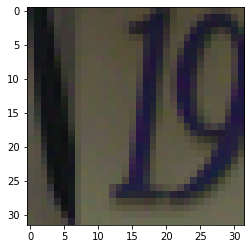

In [40]:
plt.imshow(X_train[:,:,:,0])
plt.show()

In [41]:
y_train[0]

array([1], dtype=uint8)

# COCO dataset

In [2]:
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import multiprocessing
import subprocess

In [ ]:
files = ['val2017.zip', 'annotations_trainval2017.zip', 'train2017.zip']
folder = 'data/'

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
def download_and_unzip_from_s3(file_name, bucket_name='fast-ai-coco'):
    print("Downloading", file_name)
    s3.download_file(bucket_name, file_name, folder + file_name)
    print("Finished downloading", file_name, ". Starting to unzip.")
    subprocess.run(["unzip", folder + file_name, '-d', 'data/' ])
    print("Finished unzipping", folder + file_name)

# Download in parallel
num_cpus = multiprocessing.cpu_count()
with multiprocessing.Pool(num_cpus) as p:
    p.map(download_and_unzip_from_s3, files)

print("Done transferring all datasets")

DownloadingDownloadingDownloading   annotations_trainval2017.zipval2017.ziptrain2017.zip


Finished downloading annotations_trainval2017.zip . Starting to unzip.
Finished unzipping data/annotations_trainval2017.zip
Finished downloading val2017.zip . Starting to unzip.
Finished unzipping data/val2017.zip


In [3]:
import cv2
import os
import glob

In [4]:
train_path = 'data/train2017'
valid_path = 'data/val2017'

In [5]:
data_train_path = os.path.join(train_path, '*g')
data_valid_path = os.path.join(valid_path, '*g')

In [6]:
train_files = glob.glob(data_train_path)
valid_files = glob.glob(data_valid_path)

In [7]:
X_train = []
X_test = []

In [8]:
for f in train_files[:100]:
    X_train.append(cv2.imread(f))

In [9]:
for f in valid_files[:100]:
    X_test.append(cv2.imread(f))

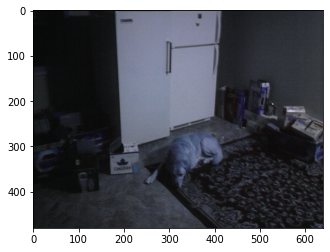

In [12]:
plt.imshow(X_train[0])